# Imports

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Data

#### The original dataset of reviews consists of actual review and generated. Artificial reviews were generated on the basis of the beginning of the actual reviews.


In [11]:
complexity_metrics = pd.read_csv("../data/review_complexity.csv", index_col=False)
complexity_metrics

,fname,N_word,V_word,N_lemma,V_lemma,C,punct,let,N,syl,...,Discourse_pr,Mark_pr,Nsubj_pr,Nsubjpass_pr,Nummod_pr,Orphan_pr,Parataxis_pr,Xcomp_pr,Cohes_1,Cohes_2
0,actual.csv,531336,65919,230207,27103,2865570,93304,2342823,6686,976890,...,0.018082,0.309362,1.229503,0.064033,0.094954,0.009883,0.305580,0.258930,5614,77759
1,generated.csv,451642,40786,156263,19524,2562019,67431,2116022,13698,846329,...,0.020674,0.188425,1.068603,0.072788,0.139817,0.003434,0.215251,0.322019,5164,63382


### We have 133 metrics. Each is some linguistics feature. For instance, we have number of nouns, verbs, punctuation, etc.

In [12]:
list(complexity_metrics.columns)

['fname',
 'N_word',
 'V_word',
 'N_lemma',
 'V_lemma',
 'C',
 'punct',
 'let',
 'N',
 'syl',
 'sent',
 'word_long',
 'word_long_pr',
 'lemma_long',
 'lemma_long_pr',
 'comma_pr',
 'ASL',
 'ASS',
 'ASW',
 'ACW',
 'L',
 'S',
 'TTR_word',
 'TTR_lemma',
 'YulesK_word',
 'YulesK_lemma',
 'YulesI_word',
 'YulesI_lemma',
 'hapax1_pr',
 'hapax2_pr',
 'FRE_GL',
 'SMOG',
 'ARI',
 'DCI',
 'CLI',
 'Func_word_pr',
 'Verb_pr',
 'Noun_pr',
 'Adj_pr',
 'Prop_pr',
 'Autosem_pr',
 'Nouns_pr',
 'NVR',
 'Cconj_pr',
 'Sconj_pr',
 'Adjs_pr',
 'Prtf_pr',
 'Prts_pr',
 'Npro_pr',
 'Pred_pr',
 'Grnd_pr',
 'Infn_pr',
 'Numr_pr',
 'Prcl_pr',
 'Prep_pr',
 'Comp_pr',
 'Pos_ngrams_1_pr',
 'Pos_ngrams_2_pr',
 'Pos_ngrams_3_pr',
 'Pos_ngrams_4_pr',
 'Pos_ngrams_5_pr',
 'Pos_ngrams_6_pr',
 'Pos_ngrams_7_pr',
 'Pos_ngrams_8_pr',
 'Pos_ngrams_9_pr',
 'Pos_ngrams_10_pr',
 'Pos_ngrams_11_pr',
 'Pos_ngrams_12_pr',
 'Dyn_Stat',
 'Zipf_0_pr',
 'Zipf_1_pr',
 'Zipf_2_pr',
 'Zipf_3_pr',
 'Zipf_4_pr',
 'Zipf_5_pr',
 'Zipf_6_pr',

## Let's Visualize

#### Word and Lemma Counts

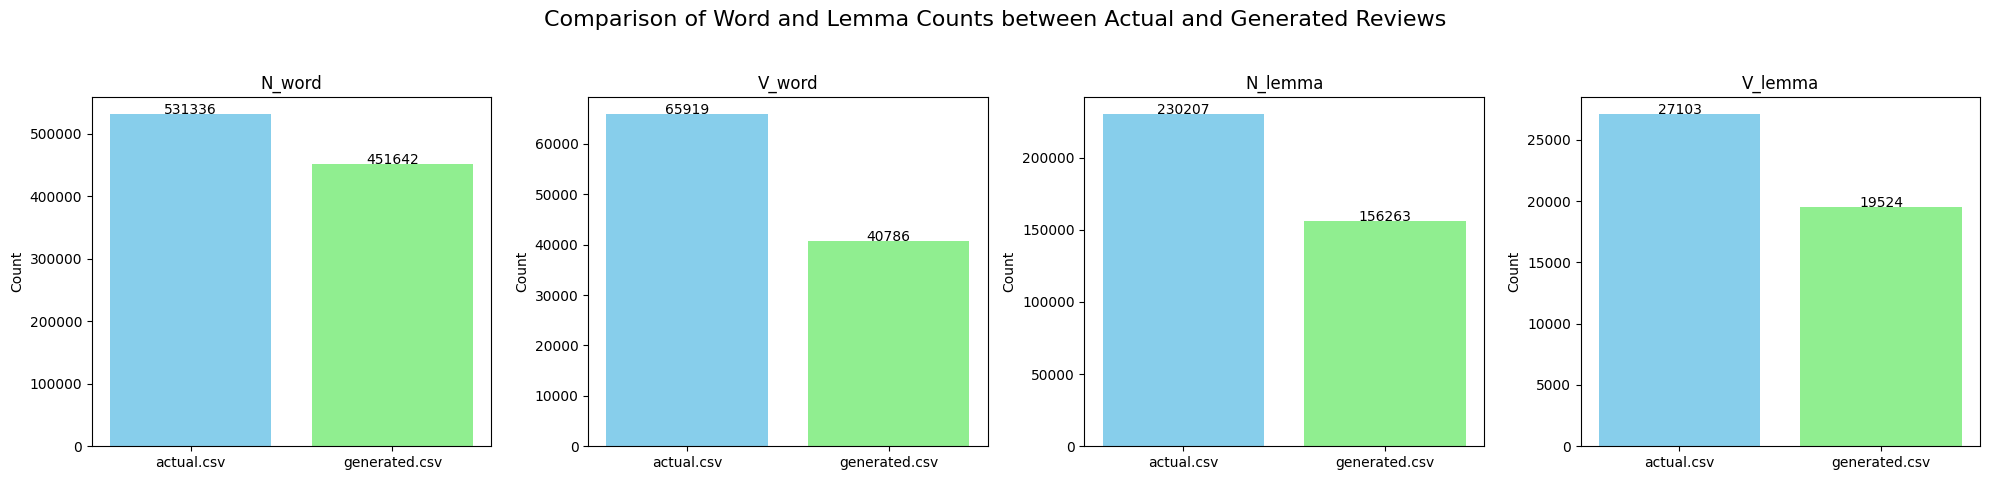

In [13]:
word_lemma_counts = complexity_metrics[["fname", "N_word", "V_word", "N_lemma", "V_lemma"]]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle('Comparison of Word and Lemma Counts between Actual and Generated Reviews', fontsize=16)

for i, col in enumerate(word_lemma_counts.columns[1:]):  
    axes[i].bar(word_lemma_counts["fname"], word_lemma_counts[col], color=['skyblue', 'lightgreen'])
    axes[i].set_title(col)
    axes[i].set_ylabel('Count')
    for index, value in enumerate(word_lemma_counts[col]):
        axes[i].text(index, value, str(value), ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

The actual reviews show higher counts in both total and unique words and lemmas compared to the generated reviews, indicating more diversity and richness in language use. This could be due to the inherent variability in human language that might be less present in generated text, or it might reflect the limitations of the text generation process in capturing the full complexity of human language. Additionally, the disparity between total and unique counts suggests that actual reviews not only contain more words and lemmas but also a broader range of them.

#### Average Sentence Length

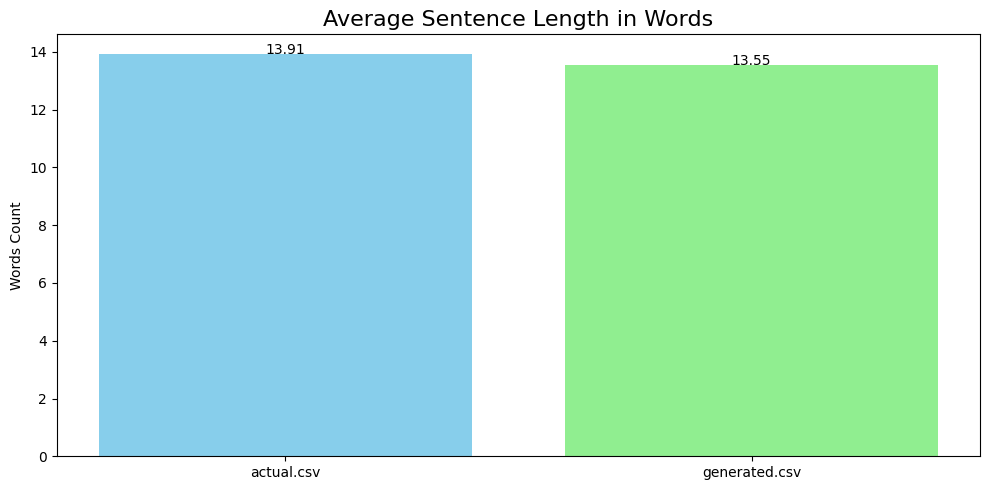

In [14]:
asl = complexity_metrics[["fname", "ASL"]]

plt.figure(figsize=(10, 5))  
plt.bar(asl["fname"], asl["ASL"], color=['skyblue', 'lightgreen'])
plt.title('Average Sentence Length in Words', fontsize=16)
plt.ylabel('Words Count')

for index, value in enumerate(asl["ASL"]):
    plt.text(index, value, f"{value:.2f}", ha='center')

plt.tight_layout()  
plt.show()


#### Hapax Legomena

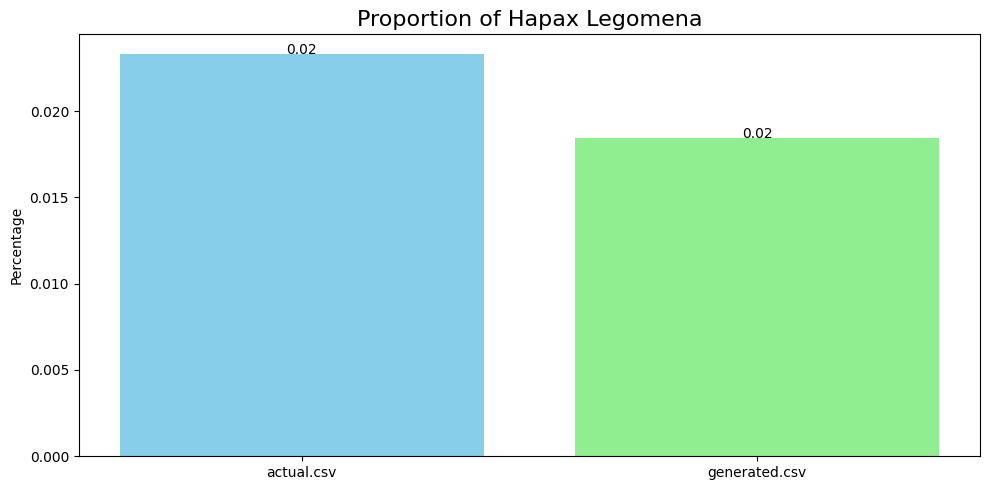

In [16]:
hapax = complexity_metrics[["fname", "hapax1_pr"]]

plt.figure(figsize=(10, 5))  
plt.bar(asl["fname"], hapax["hapax1_pr"], color=['skyblue', 'lightgreen'])
plt.title('Proportion of Hapax Legomena', fontsize=16)
plt.ylabel('Percentage')

for index, value in enumerate(hapax["hapax1_pr"]):
    plt.text(index, value, f"{value:.2f}", ha='center')

plt.tight_layout()  
plt.show()


#### POS Percentage

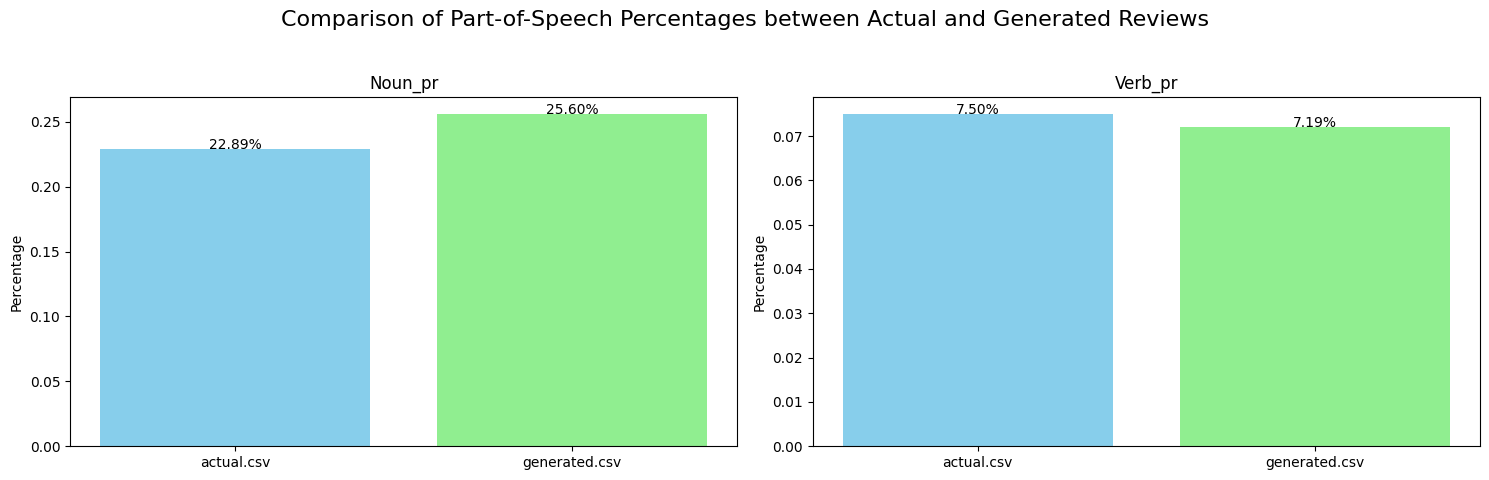

In [18]:
pos_percentages_adjusted = complexity_metrics[["fname", "Noun_pr", "Verb_pr"]]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Comparison of Part-of-Speech Percentages between Actual and Generated Reviews', fontsize=16)

for i, col in enumerate(pos_percentages_adjusted.columns[1:]):  
    axes[i].bar(pos_percentages_adjusted["fname"], pos_percentages_adjusted[col], color=['skyblue', 'lightgreen'])
    axes[i].set_title(col)
    axes[i].set_ylabel('Percentage')
    for index, value in enumerate(pos_percentages_adjusted[col]):
        axes[i].text(index, value, f"{value:.2%}", ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


#### Readability Scores

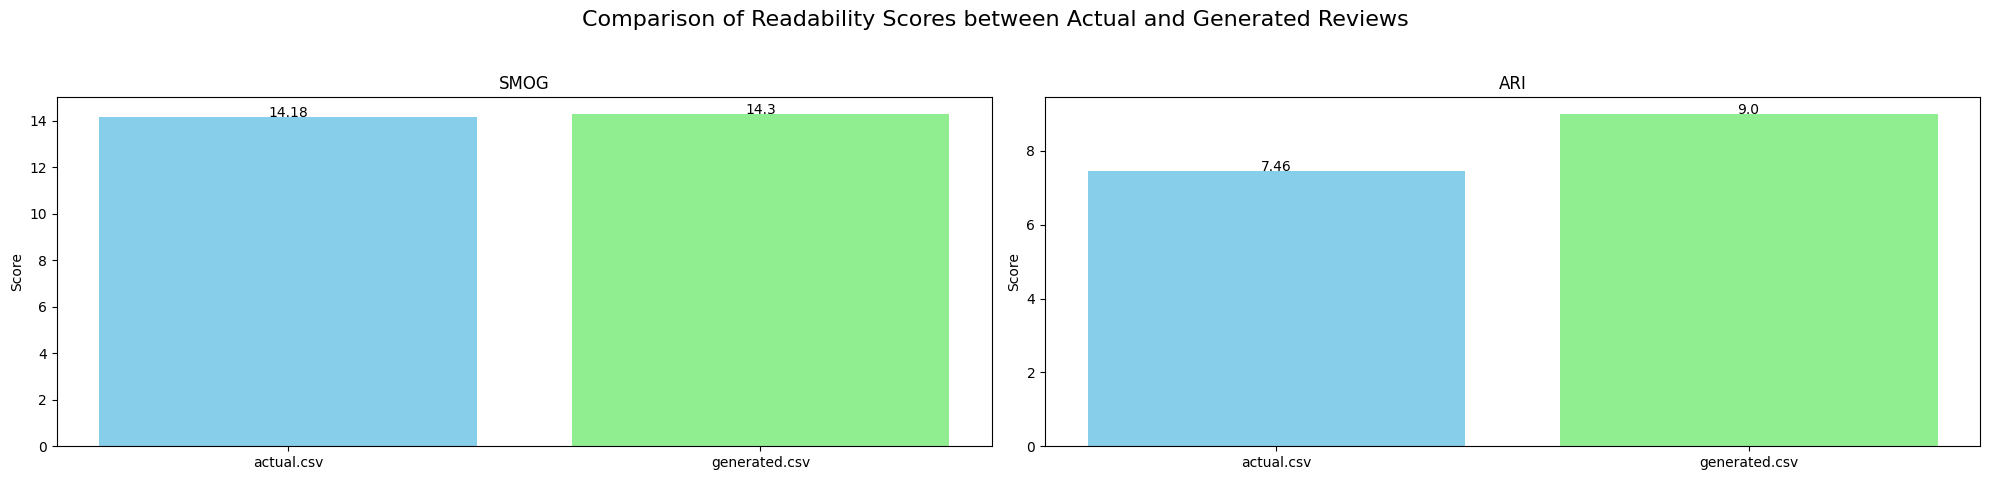

In [19]:
readability_scores = complexity_metrics[["fname", "SMOG", "ARI"]]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('Comparison of Readability Scores between Actual and Generated Reviews', fontsize=16)

for i, col in enumerate(readability_scores.columns[1:]):  
    axes[i].bar(readability_scores["fname"], readability_scores[col], color=['skyblue', 'lightgreen'])
    axes[i].set_title(col)
    axes[i].set_ylabel('Score')
    for index, value in enumerate(readability_scores[col]):
        axes[i].text(index, value, str(round(value, 2)), ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

While the SMOG index indicates a negligible difference in complexity between actual and generated reviews, the ARI suggests that generated reviews are slightly more complex or less readable than actual reviews. This could be indicative of differences in sentence construction or word choice that make the generated text less immediately accessible.

#### Relative Clause Modifiers

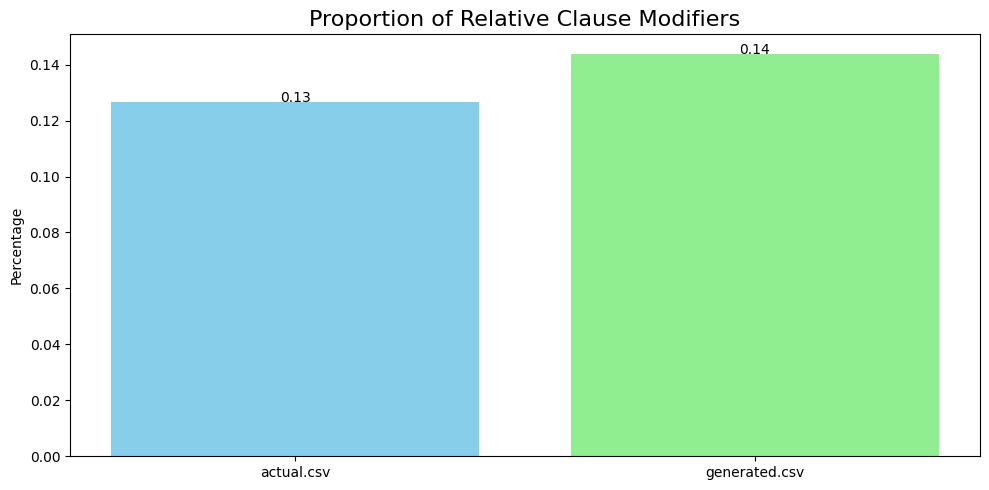

In [20]:
acl_rel = complexity_metrics[["fname", "Aclrelcl_pr"]]

plt.figure(figsize=(10, 5))  
plt.bar(asl["fname"], acl_rel["Aclrelcl_pr"], color=['skyblue', 'lightgreen'])
plt.title('Proportion of Relative Clause Modifiers', fontsize=16)
plt.ylabel('Percentage')

for index, value in enumerate(acl_rel["Aclrelcl_pr"]):
    plt.text(index, value, f"{value:.2f}", ha='center')

plt.tight_layout()  
plt.show()


The small difference between the two percentages suggests that the generated text closely mimics the complexity level of the actual reviews in terms of the use of relative clause modifiers.

#### Coordinating Conjuctions

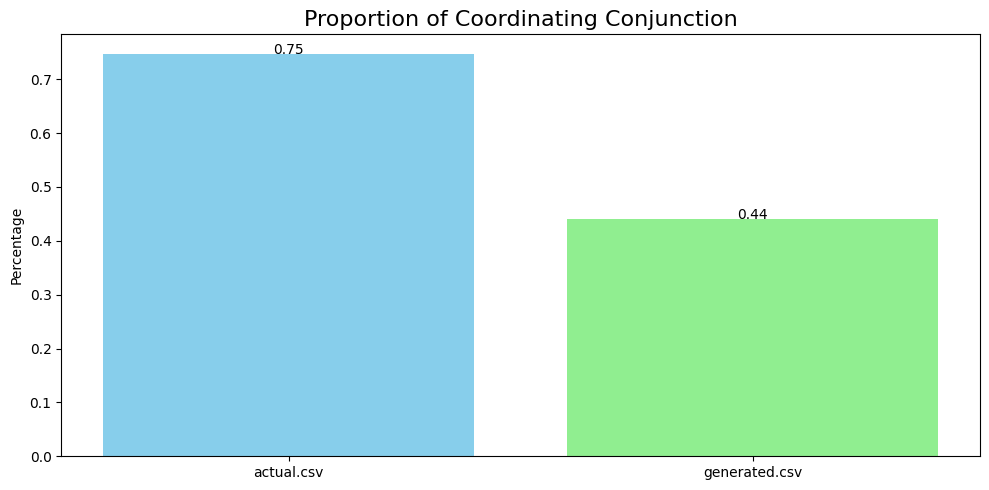

In [21]:
cc_pr = complexity_metrics[["fname", "Cc_pr"]]

plt.figure(figsize=(10, 5))  
plt.bar(asl["fname"], cc_pr["Cc_pr"], color=['skyblue', 'lightgreen'])
plt.title('Proportion of Coordinating Conjunction', fontsize=16)
plt.ylabel('Percentage')

for index, value in enumerate(cc_pr["Cc_pr"]):
    plt.text(index, value, f"{value:.2f}", ha='center')

plt.tight_layout()  
plt.show()

The significant difference between the two might affect the perceived naturalness of the generated text, with the actual reviews potentially appearing more fluid and varied due to the higher use of conjunctions.

# Number of Tokens (lemmas)

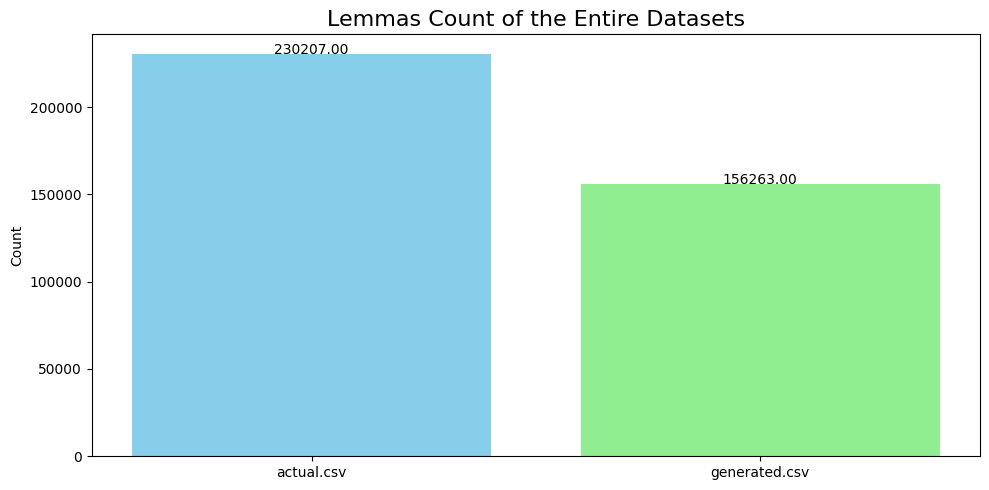

In [22]:
n_lemma = complexity_metrics[["fname", "N_lemma"]]

plt.figure(figsize=(10, 5))  
plt.bar(n_lemma["fname"], n_lemma["N_lemma"], color=['skyblue', 'lightgreen'])
plt.title('Lemmas Count of the Entire Datasets', fontsize=16)
plt.ylabel('Count')

for index, value in enumerate(n_lemma["N_lemma"]):
    plt.text(index, value, f"{value:.2f}", ha='center')

plt.tight_layout()  
plt.show()

# Average sentence length in syllables 

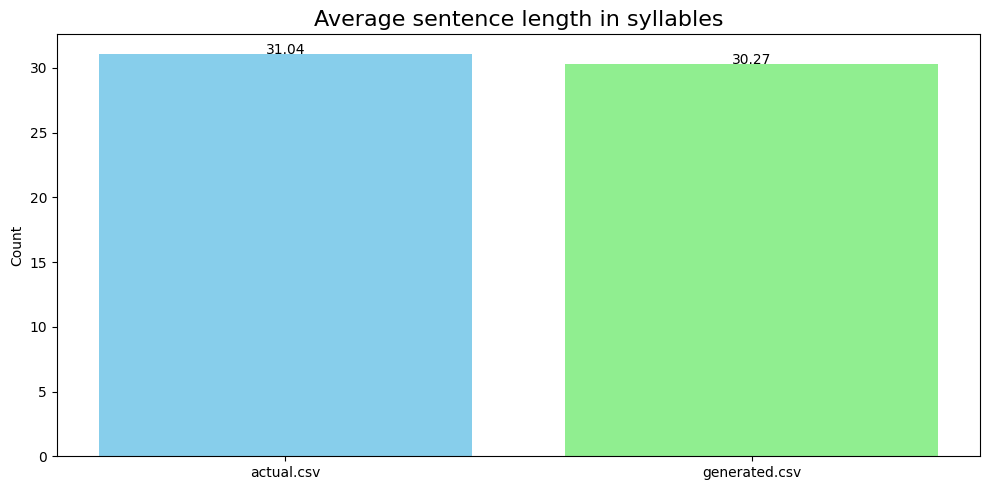

In [23]:
syl_len = complexity_metrics[["fname", "ASS"]]

plt.figure(figsize=(10, 5))  
plt.bar(syl_len["fname"], syl_len["ASS"], color=['skyblue', 'lightgreen'])
plt.title('Average sentence length in syllables', fontsize=16)
plt.ylabel('Count')

for index, value in enumerate(syl_len["ASS"]):
    plt.text(index, value, f"{value:.2f}", ha='center')

plt.tight_layout()  
plt.show()